# Assignment3

1. sklearn 패키지를 사용해 로지스틱 회귀모형으로 데이터를 분석해 주세요 
2. 성능지표를 계산하고 이에 대해 해석해 주세요 
   - sklearn : mean accuracy, f1 score 등 다양한 성능지표 계산 
   - confusion matrix : tp, fp, fn, tn 값을 통해 성능지표 계산  
3. 어떤 성능지표를 기준으로 성능을 개선을 시도했고, 그러한 선택의 이유를 적어주세요.
4. **해석을 상세하게 달아주세요 !**

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import numpy as np

In [96]:
credit = pd.read_csv("assignment3_creditcard.csv")

In [97]:
credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [98]:
credit.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,...,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535,0.008578
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,...,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736,0.092221
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915,0.000000
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,...,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189,0.000000
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,...,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075,0.000000
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,...,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911,0.000000
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,...,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133,1.000000


In [99]:
# 결측치 확인
data.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
Class    0
dtype: int64

결측치 없음

In [100]:
columns = credit.columns

In [101]:
# min max 값의 차이가 큼 -> Standard Scaler 통해 데이터를 단위 분산으로 조정
from sklearn.preprocessing import StandardScaler

In [102]:
scaler = StandardScaler()
scaler.fit_transform(credit)

array([[-0.90218019,  1.44246214,  0.24207645, ..., -0.04709654,
         0.9417547 , -0.09301733],
       [ 1.02744235, -0.32892601, -0.7953942 , ..., -0.23721911,
        -0.22629752, -0.09301733],
       [-1.46190736, -1.73320058,  0.7053479 , ..., -0.7554671 ,
        -1.02943014, -0.09301733],
       ...,
       [ 1.02786291,  0.0843943 , -0.9747001 , ..., -0.15087861,
        -0.1030219 , -0.09301733],
       [-0.33236542,  0.79733419,  0.8782926 , ..., -2.140772  ,
        -1.05999649, -0.09301733],
       [ 1.09831537, -0.52987507, -0.90637085, ..., -0.13776702,
        -0.2565925 , -0.09301733]])

In [103]:
# scaling 한 데이터로 dataframe 생성
data = pd.DataFrame(scaler.fit_transform(credit), columns = columns)

In [104]:
# Class 변수 설정 

data['Class'] = credit.Class # class 1: fraudulent transaction, 0: otherwise
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.902180,1.442462,0.242076,0.682170,-0.545636,1.897453,-3.087657,-7.481774,-1.310739,-1.750813,...,3.586292,-6.258702,1.163043,0.721013,-0.838813,1.973207,-1.295843,-0.047097,0.941755,0
1,1.027442,-0.328926,-0.795394,-0.395393,0.029429,-0.432294,0.005620,-0.185605,1.049741,-0.240491,...,-0.110982,0.038445,0.528470,0.078108,0.993348,0.194594,2.026379,-0.237219,-0.226298,0
2,-1.461907,-1.733201,0.705348,-0.027248,-0.751404,-0.194335,0.415558,0.461429,0.403048,-1.409372,...,1.864714,0.429058,-0.520817,2.025422,0.676446,0.019311,1.577217,-0.755467,-1.029430,0
3,-0.720659,0.921458,0.191638,0.540317,-0.333272,-0.533410,0.368140,0.395090,-0.672139,0.292162,...,0.049651,0.125696,0.549344,-0.188079,0.898622,-0.414465,-0.857327,0.065929,-0.511850,0
4,-0.131203,-0.224824,-1.203698,-0.599739,0.094078,-1.105548,1.362418,-0.622372,-1.085267,0.894765,...,-1.219154,-0.017103,1.373663,-0.036971,0.129301,-2.831946,1.555181,1.248615,1.110322,0


In [105]:
#각 class 별 데이터 분포 확인하기 
data.Class.value_counts()

0    28432
1      246
Name: Class, dtype: int64

Fraudulent transaction 246개

fraudulent transaction이 일어난 경우보다 아닌 경우가 훨씬 많다는 것을 확인할 수 있다. 

## Logistic Regression 

In [106]:
## Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [107]:
# 회원 데이터와 transaction fraudness 여부 분리하기 
X = data.drop(["Class"], axis=1)
y = data["Class"]

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [109]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(21508, 28) (7170, 28) (21508,) (7170,)


<AxesSubplot:>

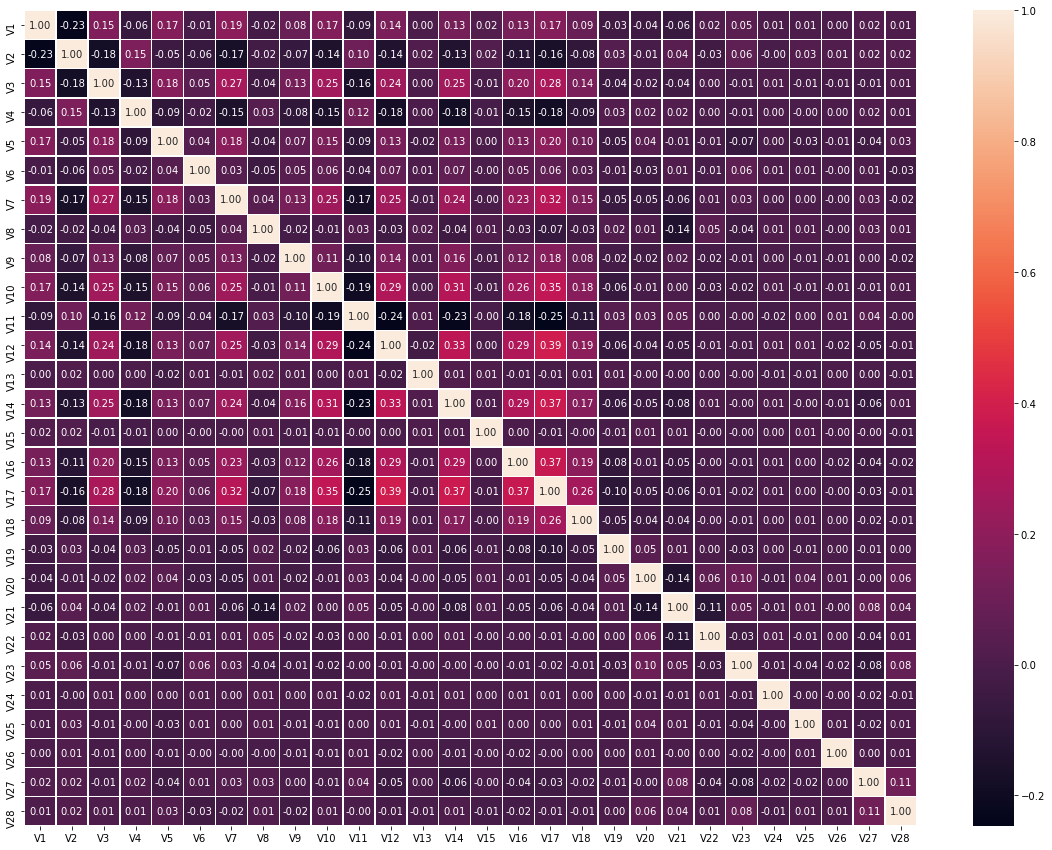

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize = (20,15))
sns.heatmap(data = X_train.corr(), annot=True, fmt = '.2f', linewidths=.5)

회원 변수간의 상관관계 보기 

In [111]:
# Class 와 다른 변수와의 상관관계

class_corr = data.corr()['Class']
abs(class_corr)

V1       0.241863
V2       0.230970
V3       0.404299
V4       0.298022
V5       0.215617
V6       0.100993
V7       0.387461
V8       0.028900
V9       0.221992
V10      0.441419
V11      0.341386
V12      0.506636
V13      0.008053
V14      0.571421
V15      0.004760
V16      0.410511
V17      0.549825
V18      0.250407
V19      0.086004
V20      0.045712
V21      0.112407
V22      0.007118
V23      0.010063
V24      0.020952
V25      0.010078
V26      0.012928
V27      0.042395
V28      0.032054
Class    1.000000
Name: Class, dtype: float64

`V14`, `V17`, `V12` 순으로 예측해야 하는 Class와 높은 상관관계를 보이는 것을 확인할 수 있다. 

In [112]:
## 상관관계가 낮은 변수들 제거
X_train = X_train.drop(['V13', 'V15','V22'], axis = 1)

학습 변수가 너무 많을 시 overfitting될 가능성이 커지므로 상관계수가 0.01보다 작은 변수들을 제거

In [113]:
# Logistic Regression 
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [117]:
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
2124,0.534421,-0.313517,0.716192,0.069741,-0.646730,0.242467,-0.474069,0.194604,0.715443,-0.257232,...,0.362883,-0.010502,-0.151579,-0.117965,0.165144,0.558574,0.058141,1.937241,-0.050539,0.023525
5521,0.002799,-0.083982,0.262826,-0.324989,1.722921,-1.364623,-1.504266,-0.564742,0.249800,0.145562,...,0.164608,-0.757266,0.572667,-2.315126,-6.629007,-0.537465,-0.734286,0.377609,0.719752,1.124016
21800,-0.139585,0.300528,0.009551,2.134864,-0.088448,0.910295,0.448458,0.538950,-0.858702,0.473706,...,-1.617241,-0.076433,0.597821,1.637071,0.720451,1.231422,-0.728445,0.183949,-0.335520,-0.124756
16959,0.644182,0.067492,-0.223307,0.060758,0.463783,0.521320,-0.087450,0.165252,0.008127,-0.074930,...,0.461728,-0.129742,-0.402064,-1.319926,-0.090171,-2.931245,0.623957,0.448494,-0.045078,-0.011628
27369,0.927307,-0.954131,-1.162071,-0.817260,-0.037908,0.011651,-0.178523,-0.093171,-0.525459,0.802262,...,1.255995,0.577588,0.623964,1.369421,-0.490301,-0.490490,0.436944,0.143988,-0.226306,-0.154167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8867,1.048594,-0.493044,-0.639749,-0.508939,-0.473678,-0.466616,-0.660688,0.004773,-0.085330,0.243171,...,0.731803,0.037261,0.302367,1.093982,0.101913,-0.735211,-0.287835,-0.177076,0.053172,-0.090364
12996,0.962826,-0.352257,-0.159485,0.162110,-0.335413,0.158340,-0.528602,0.144447,0.881895,0.159519,...,-0.068530,-0.213143,0.243681,1.055309,0.338033,1.266732,-0.595082,1.072024,-0.064440,-0.172499
2886,0.869916,-0.992986,-1.621548,-0.853444,1.171842,2.550774,-0.405549,0.498952,-0.396131,0.599434,...,-1.416267,-0.208122,0.074369,0.410825,-0.187444,1.198202,0.348908,-0.040189,-0.020308,-0.085821
829,0.421656,-0.189512,0.875645,1.725464,-0.627054,0.402334,-0.450238,0.234019,0.068465,0.472060,...,-2.185057,0.050195,0.368002,0.878334,-0.152691,0.095752,0.206819,0.275324,0.084268,0.190742


In [118]:
# class 예측

X_test = X_test.drop(['V13', 'V15','V22'], axis=1) #train 과 동일하게 상관관계가 낮은 변수들 제거
y_pred = classifier.predict(X_test) 
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [119]:
# [0으로 분류될 확률, 1로 분류될 확률]
classifier.predict_proba(X_test)

array([[9.99038853e-01, 9.61146692e-04],
       [9.99525292e-01, 4.74708273e-04],
       [9.92530382e-01, 7.46961777e-03],
       ...,
       [9.99819187e-01, 1.80813066e-04],
       [9.95988990e-01, 4.01101034e-03],
       [9.99782067e-01, 2.17932774e-04]])

In [122]:
# mean accuracy 
classifier.score(X_test, y_test)

0.997907949790795

## 입력값과 출력값 비교

In [123]:
prob = [prob[1] for prob in classifier.predict_proba(X_test)] # class 1에 속할 확률 

In [124]:
ce_df = {
    'y_test' : y_test, # 실제
    'y_pred' : y_pred, # 예측
    'prob' : prob      # 1로 분류할 확률 
}

ce_df = pd.DataFrame(ce_df)

In [125]:
ce_df

,y_test,y_pred,prob
2124,0,0,0.000961
5521,0,0,0.000475
21800,0,0,0.007470
16959,0,0,0.000347
27369,0,0,0.000036
...,...,...,...
8867,0,0,0.000243
12996,0,0,0.000790
2886,0,0,0.000181
829,0,0,0.004011


In [126]:
yi = ce_df["y_test"].to_numpy()
pi = ce_df["prob"].to_numpy()

In [127]:
# cross entropy 
-np.sum((yi * np.log(pi) + (1-yi) * np.log(1-pi))) / ce_df.shape[0]

0.007800480494491307

# Metrics Evaluation

In [128]:
from sklearn.metrics import *

In [129]:
# f1 score
f1_score(y_pred, y_test) 

0.845360824742268

In [130]:
ce_df.y_pred.value_counts()

0    7125
1      45
Name: y_pred, dtype: int64

예측한 값들의 클래스별 분포를 파악. 

In [131]:
print(confusion_matrix(y_pred, y_test))

[[7114   11]
 [   4   41]]


0,1로 분류하는 이 데이터에 대한 Confusion Matrix는 순서대로 [[True Positive, False Positive], [False Negative, True Negative]]의 형식으로 나타나진다.

- 정밀도(Precision): 위의 confusion matrix를 살펴보면 0(not fraudulent)으로 예측한 것들이 7114/7125 로 0.998 이다. 
- 재현율(Recall): 위의 confusion matrix를 살펴보았을 때 실제 맞게 예측한 것 중에서 0(not fraudulent)으로 예측한 것의 비율은 7114/7118로 0.999이다. 
- F1 score: 위의 confusion matrix에 의해서 0으로 예측한 경우의 F1 score는 1이 된다. 



In [132]:
#Classification Report
print(classification_report(y_test,y_pred, labels = [0,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7118
           1       0.91      0.79      0.85        52

    accuracy                           1.00      7170
   macro avg       0.95      0.89      0.92      7170
weighted avg       1.00      1.00      1.00      7170



실제로 Classification Report를 출력해 성능지표를 계산해 보았을 때 동일한 결과를 얻는 것을 알 수 있다. 


성능개선시 imbalanced data의 경우 데이터가 많은 class로 예측 쏠림 현상이 일어난다. 이 데이터의 경우에도 fraud라고 분리된 credit card transaction 횟수보다 정상적인 transaction의 횟수가 더 많다. 때문에 정밀도만을 살피기보다 실제 맞게 예측한 것 중에서의 class 비율도 포함한 F1-score를 척도로 성능개선을 시도해 보았다.